In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle
%matplotlib inline

# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [2]:
earthquake = pd.read_csv("earthquake.csv")

In [3]:
earthquake

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
...,...,...,...,...,...,...,...,...,...,...
3588,8,Canape Vert road destroyed,13/01/2010 02:57,Port-au-Prince,"Canape Vert, one of the main roads that leads ...","5c. Route barree | Road blocked,",18.539167,-72.335000,YES,NO
3589,7,Collapsed Building -- People Trapped,12/01/2010 09:55,"Delmas 19, Rue Mackendal #8 Port-au-Prince, Haiti",My mother is part of a medical team that had j...,"5a. Structure effondres | Collapsed structure,...",18.539269,-72.336408,YES,NO
3590,6,Eye-Witness Report from Hotel Oloffson,12/01/2010 11:16,"Ave Christophe #60, Port au Prince, Haiti","Tequila Minsky, a New York-based photographer ...","5a. Structure effondres | Collapsed structure,",18.538328,-72.333067,YES,NO
3591,5,Port-au-Prince air traffic control tower damag...,12/01/2010 04:08,"Airport, Port-au-Prince, Haiti",NBC reports Port-au-Prince air traffic control...,"5b. Structures a risque | Unstable Structure,",18.579721,-72.292778,YES,NO


In [4]:
earthquake[["INCIDENT DATE","LATITUDE","LONGITUDE"]].head(10)

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [5]:
#solution code
count_nan_in_df = earthquake.isnull().sum()
print (count_nan_in_df)

Serial            0
INCIDENT TITLE    0
INCIDENT DATE     0
LOCATION          1
DESCRIPTION       0
CATEGORY          6
LATITUDE          0
LONGITUDE         0
APPROVED          0
VERIFIED          0
dtype: int64


In [6]:
earthquake[earthquake["CATEGORY"].isna()]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [7]:
#solution code
earthquake.dropna(inplace=True)

In [8]:
earthquake_clean = earthquake[(earthquake["LATITUDE"] >= 18) & (earthquake["LATITUDE"] <= 20) & (earthquake["LONGITUDE"] >= -75) & (earthquake["LONGITUDE"] <= -70)]
earthquake_clean

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
...,...,...,...,...,...,...,...,...,...,...
3588,8,Canape Vert road destroyed,13/01/2010 02:57,Port-au-Prince,"Canape Vert, one of the main roads that leads ...","5c. Route barree | Road blocked,",18.539167,-72.335000,YES,NO
3589,7,Collapsed Building -- People Trapped,12/01/2010 09:55,"Delmas 19, Rue Mackendal #8 Port-au-Prince, Haiti",My mother is part of a medical team that had j...,"5a. Structure effondres | Collapsed structure,...",18.539269,-72.336408,YES,NO
3590,6,Eye-Witness Report from Hotel Oloffson,12/01/2010 11:16,"Ave Christophe #60, Port au Prince, Haiti","Tequila Minsky, a New York-based photographer ...","5a. Structure effondres | Collapsed structure,",18.538328,-72.333067,YES,NO
3591,5,Port-au-Prince air traffic control tower damag...,12/01/2010 04:08,"Airport, Port-au-Prince, Haiti",NBC reports Port-au-Prince air traffic control...,"5b. Structures a risque | Unstable Structure,",18.579721,-72.292778,YES,NO


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

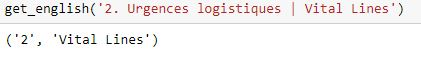

In [9]:
#solution code
def get_english(str):
    strData = str.split(",")
    returnList = list()
    for i in strData:
        splitted = i.split(".")
        num = splitted[0].strip()
        try:
            eng_name = splitted[1].split("|")[1].strip()         
            returnList.append((num,eng_name))
        except:
            try:
                returnList.append((num,splitted[1].strip()))
            except: pass
    if(len(returnList) > 1):
        return returnList
    return returnList[0]

In [10]:
#solution code
earthquake_clean["CATEGORY"].apply(get_english)

0                    [(1, Emergency), (3, Public Health)]
4                                          (1, Emergency)
5                          (5e, Communication lines down)
6       [(4, Security Threats), (4e, Water sanitation ...
7                                   (4, Security Threats)
                              ...                        
3588                                   (5c, Road blocked)
3589    [(5a, Collapsed structure), (1c, People trapped)]
3590                            (5a, Collapsed structure)
3591                             (5b, Unstable Structure)
3592                            (5a, Collapsed structure)
Name: CATEGORY, Length: 3568, dtype: object

### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

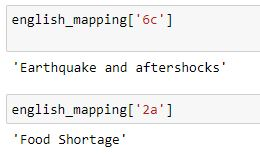

In [11]:
#solution code
english_mapping = dict()
def mapping(english_mapping):
    for i in earthquake_clean["CATEGORY"].apply(get_english): 
        if(type(i) == list):
            for j in i:
                try:
                    english_mapping[j[0]]
                except:                 
                    english_mapping[j[0]] = j[1]
        else:
            try:
                english_mapping[i[0]]
            except:                 
                english_mapping[i[0]] = i[1]
mapping(english_mapping)

In [12]:
english_mapping["6c"]

'Earthquake and aftershocks'

### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [13]:
births = pd.read_csv("births.csv") 
print(births.head()) 
births['day'].fillna(0, inplace=True) 
births['day'] = births['day'].astype(int)

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [14]:
births['quinquennial'] = (5 * (births['year'] // 5)) + 4
births.pivot_table('births', index='quinquennial', columns='gender', aggfunc='sum')

gender,F,M
quinquennial,,
1969,1753634,1846572
1974,8224392,8659947
1979,8038683,8461603
1984,8898836,9356506
1989,9411515,9886946
1994,9913375,10395760
1999,9566079,10024793
2004,9931641,10406088
2009,8297668,8700340


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

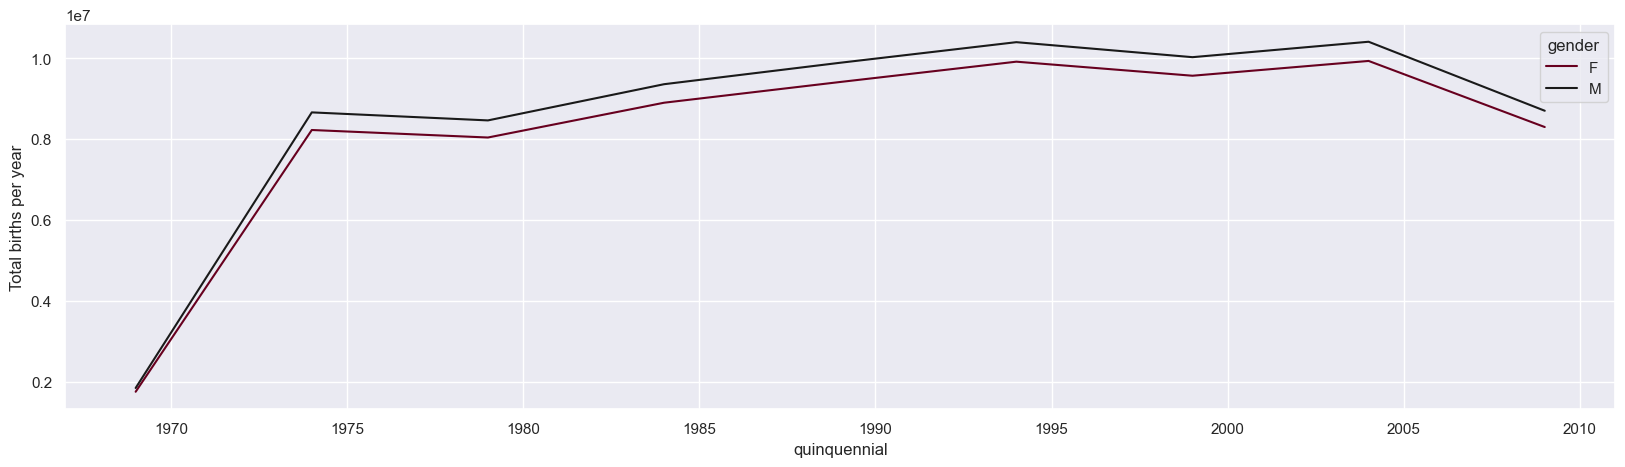

In [15]:
#solution code
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(20,5)})
births.pivot_table('births', index='quinquennial', columns='gender', aggfunc='sum').plot(cmap = "RdGy")
plt.ylabel("Total births per year")
plt.show()

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

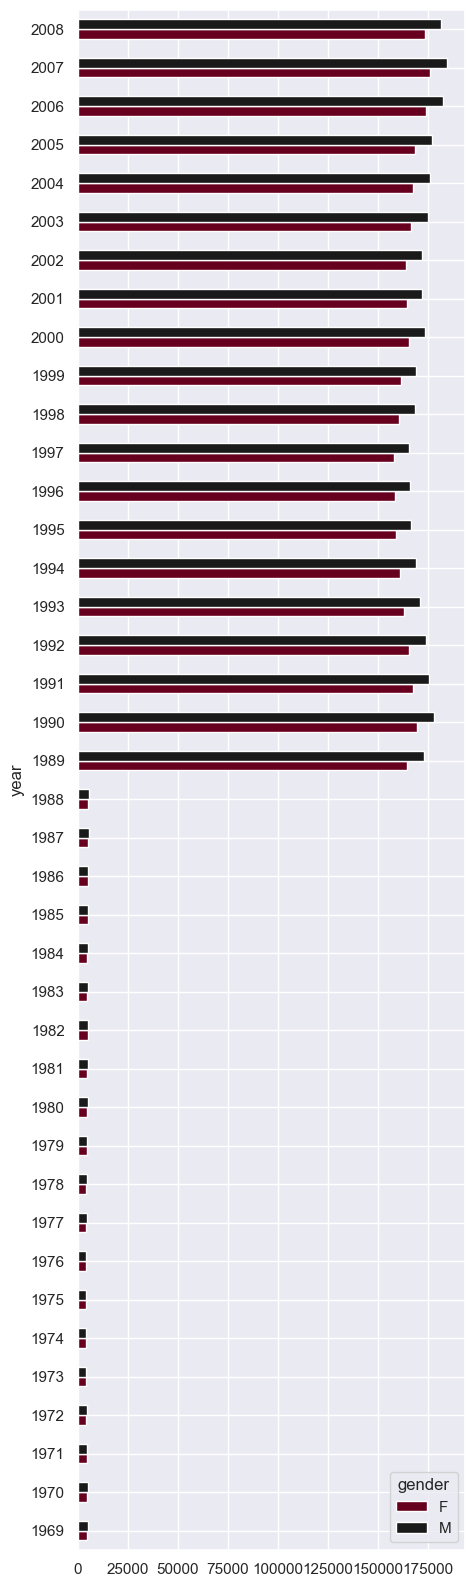

In [16]:
#solution code
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(5,20)})
births.pivot_table('births', index='year', columns='gender', aggfunc='mean').plot(kind="barh",cmap="RdGy") 
plt.show()

### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


In [17]:
# solution code
tips = pd.read_csv("tip.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips["tip_percentage"] = round(((tips["tip"] / tips["total_bill"]) * 100), 2)

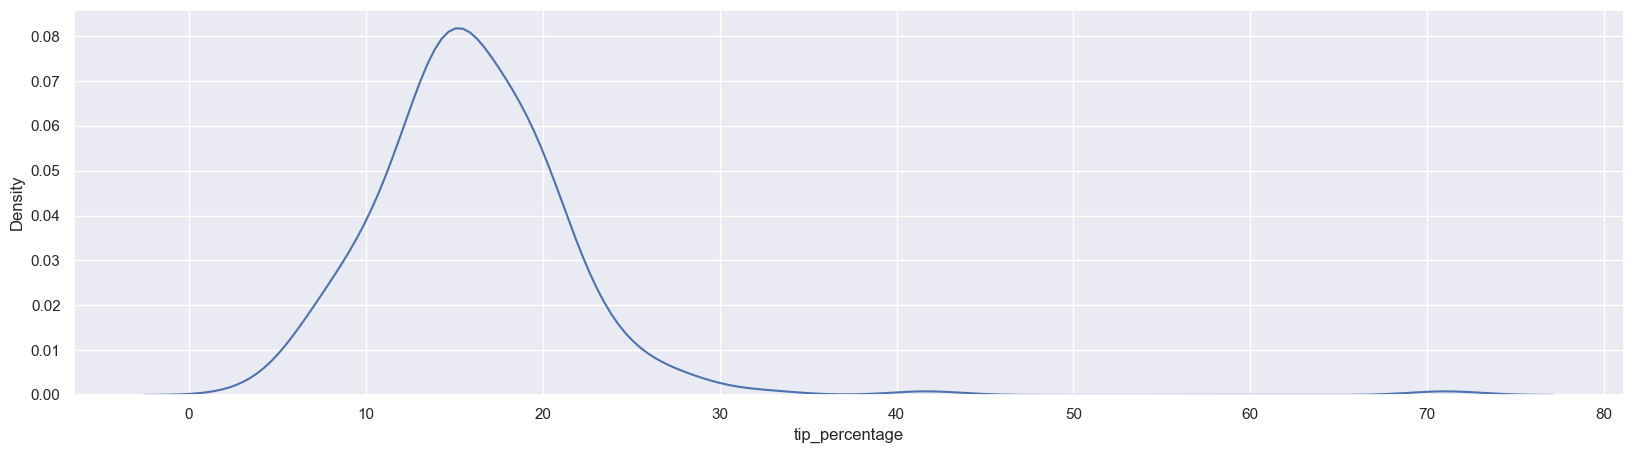

In [19]:
sns.set(rc={'figure.figsize':(20,5)})
sns.kdeplot(data=tips, x="tip_percentage")
plt.show()

### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [20]:
# solution code
grouped_data = tips["tip_percentage"].groupby([tips.sex,tips.smoker])
print(grouped_data.mean())
print("----------------------------------")
print(grouped_data.std())

sex     smoker
Female  No        15.691111
        Yes       18.214545
Male    No        16.066598
        Yes       15.276667
Name: tip_percentage, dtype: float64
----------------------------------
sex     smoker
Female  No        3.641717
        Yes       7.159585
Male    No        4.184634
        Yes       9.058490
Name: tip_percentage, dtype: float64


### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

In [21]:
# soution code
tmp = pd.DataFrame(tips["size"].groupby(tips["day"]).value_counts())

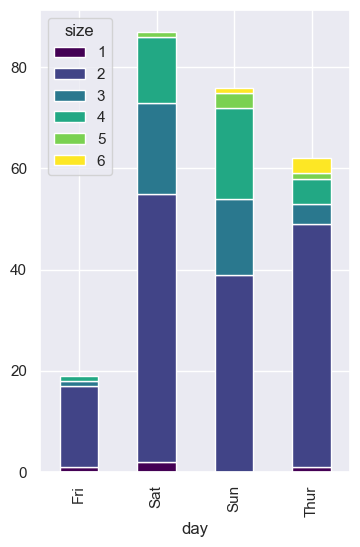

In [22]:
sns.set(rc={'figure.figsize':(4,6)})
pvtTip = tips.pivot_table('size', index='day', columns=tips["size"], aggfunc='count').fillna(0)
pvtTip.plot(kind="bar",stacked=True,cmap="viridis")
plt.show()

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

<AxesSubplot: xlabel='day'>

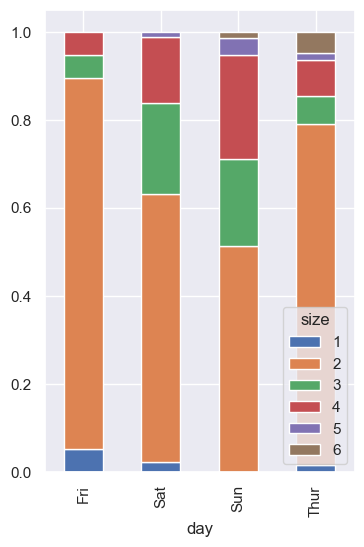

In [23]:
pvtTip.div(pvtTip.sum(axis=1),axis=0).plot(kind="bar",stacked=True)